In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
input_fn = './scores/scores:2.csv'
n_samples = 200

In [33]:
df = pd.read_csv(input_fn, header=None)
df.columns = ['group', 'watermark', 'used?', 'loss']
df.head(1)

,group,watermark,used?,loss
0,2,"""Anything goes"" ""anything goes"" ""Anything goes...",True,4.375


In [34]:
for i, g in df.groupby('group'):
    test_statistic = g.iloc[0]['loss']
    samples = g.iloc[1:]
    p = np.mean(samples.loss > test_statistic)
    print(i, p, len(samples), samples.loss.mean() == test_statistic, len(g.iloc[0]['watermark']))

2 0.72 200 False 26232
3 1.0 200 False 2779
5 0.965 200 False 22686
8 0.99 200 False 8026
9 0.99 200 False 5236
11 0.99 200 False 1924
15 0.855 200 False 1256
16 0.985 200 False 4316
17 1.0 200 False 4537
20 1.0 200 False 2610
21 1.0 200 False 1292
22 0.0 200 True 45611
23 0.995 200 False 2374
24 1.0 200 False 1501
28 0.955 200 False 2422
31 0.695 200 False 67227
32 0.995 200 False 20031
33 1.0 200 False 3671
36 1.0 200 False 15703
37 1.0 200 False 65373
38 1.0 200 False 3405
39 1.0 200 False 1518
40 0.88 200 False 1234
41 0.995 200 False 1508
42 1.0 200 False 19298
44 1.0 200 False 861
45 0.99 200 False 5167
47 0.845 200 False 7766
50 1.0 200 False 4411
53 1.0 200 False 5158
54 1.0 200 False 2964
58 0.82 200 False 1389
63 0.99 200 False 4270
65 0.98 200 False 5822
67 0.97 200 False 2978
69 1.0 200 False 5412
70 0.515 200 False 1304
72 1.0 200 False 2838
73 1.0 200 False 2679
74 0.605 200 False 4307
77 0.995 200 False 2882
80 0.995 200 False 1633
81 0.985 200 False 2820
86 1.0 200 Fals

In [35]:
test_statistic = df[df['used?']]['loss'].mean()
test_statistic

5.360102780418251

In [36]:
samples = []
null = df
for i in range(1, n_samples):
    samples.append(null.iloc[range(i,len(null),n_samples+1)]['loss'].mean())

In [37]:
z_score = (test_statistic - np.mean(samples)) / np.std(samples)
z_score

-3.7538193100986073

In [38]:
print(np.sum(np.array(samples) > test_statistic))

199


/home/johnny/.conda/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


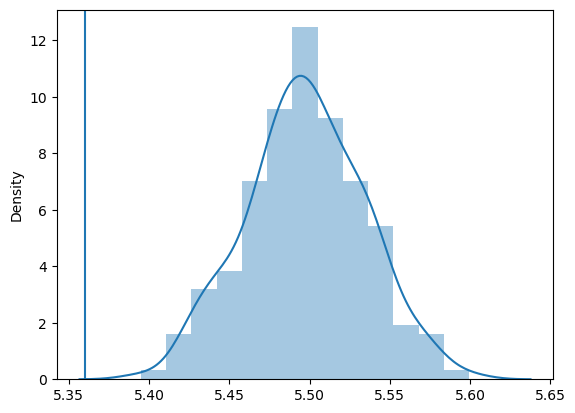

In [39]:
sns.distplot(samples)
plt.axvline(test_statistic)